# VISUALIZATION OF FORDGoBIKE DATA
### (JANUARY 2018- DECEMBER 2018)
#### By SUBHAM KUMAR GUPTA



### INTRODUCTION:
>FordGoBike is a public bike sharing system currently operating in the San Francisco, San Jose and East-Bay area of California,USA. It began it's service in 2013 with only 700 bikes servicing arround 70 locations arround the Bay-Area,San Francisco. Since then the FordGoBike system has expanded to over 7000 bikes covering three major regions in California. In the month of June-2019, FordGoBike systems changed it's branding to Lyft BayWheels Bike Sharing Company. It is currently a major player in the bikes sharing market in the region, with key-players being UBER, JUMP and LIME.

>Like other bike sharing services, the FordGoBike systems also has a network of specially designed sturdy and attractive bikes that are suitable for all types of users.The bikes can unlocked from any station through the mobile app and can be returned to any other station within the servicing area, making it an ideal choice for one-way trips around the city.The bikes are available 24/7 and people use it to commute to work, to school or any other social events in a fun,convenient and affordable way.

## Preliminary Wrangling

> This document explores a dataset from the FordGoBike bike sharing system, it consists of data related to every ride during the year 2018. The dataset contains 1863721 data-points with data related to trip-duration, start and end time of the trip, starting and ending stations, bike_id and user_type.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### I saved the csv files from the FordGoBike website in one location on my computer. 
#### I then used the glob and os modules to store, load, and combine the files into one new file, fordgo_master.csv:

path = r'D:\bertelsmann_udacity\udacity_final_project\data1'

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('fordgobike_master_2018.csv', index = False)

In [5]:
#I did my project on google colab:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#Loading the dataset in pandas:
bike_data=pd.read_csv("fordgobike_master_2018.csv")
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [5]:
 #Getting an overview of the whole dataset:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [6]:
#sampling the data helps understand the required cleaning needed for the dataset:
bike_data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
409923,1109,2018-04-09 20:19:02.9240,2018-04-09 20:37:32.1250,130.0,22nd St Caltrain Station,37.757369,-122.392057,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,920,Subscriber,No
303289,859,2018-03-05 08:16:17.4980,2018-03-05 08:30:36.5320,95.0,Sanchez St at 15th St,37.766219,-122.431060,19.0,Post St at Kearny St,37.788975,-122.403452,1941,Subscriber,No
1788434,385,2018-12-17 08:43:02.8790,2018-12-17 08:49:28.3510,218.0,DeFremery Park,37.812331,-122.285171,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,54,Subscriber,No
1104622,381,2018-08-17 16:47:36.5880,2018-08-17 16:53:58.3740,64.0,5th St at Brannan St,37.776754,-122.399018,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1286,Subscriber,No
433566,819,2018-04-03 16:05:27.4440,2018-04-03 16:19:06.8160,274.0,Oregon St at Adeline St,37.857567,-122.267558,243.0,Bancroft Way at College Ave,37.869360,-122.254337,3222,Customer,No


In [7]:
bike_data.shape

(1863721, 14)

In [8]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [9]:
#checking for null values:
sum(bike_data.duplicated())

0

In [10]:
#checking for null values:
bike_data.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

###  Data Cleaning:
<ol>
<li>Start and end times are not in the timestamp format.</li>
<li>The start_station_id and the end_station_id column data are not in the correct data-type, It should be of object data-type.</li>
<li>The bike_id column should be of object data-type.</li>
<li>Null values present in the start_station_id, start_station_name, end_station_id and end_station_name</li>

</ol>

In [11]:
df_clean=bike_data.copy()

Changing start and end time to the timestamp format:

In [12]:
df_clean.start_time=pd.to_datetime(df_clean.start_time)
df_clean.end_time=pd.to_datetime(df_clean.end_time)


In [13]:
#changing the user_type data to category data-type
df_clean.user_type=df_clean.user_type.astype('category')

Changing the data-type of the start_station_id,end_station_id and the bike_id to string data-type

In [14]:
df_clean.start_station_id=df_clean.start_station_id.astype(str)
df_clean.end_station_id=df_clean.end_station_id.astype(str)
df_clean.bike_id=df_clean.bike_id.astype(str)


In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 186.6+ MB


In [16]:
df_clean.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

It look's like there are null values present in the start and end station names, which is not much important in my search area so I am going to drop these values.

In [17]:
df_clean.dropna(inplace=True)

In [18]:
df_clean.isnull().sum()


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [19]:
df_clean.shape

(1851950, 14)

## DATA WRANGLING in-depth

Define:
Creating month/weekday/hour columns related to the start_time of the ride.

In [20]:
#code:
#start_time_month:(January-December)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')
#start_time_month:(1-12)
df_clean['start_time_month_num'] = df_clean['start_time'].dt.month.astype(int)
#start_time_weekday:
df_clean['start_time_day'] = df_clean['start_time'].dt.strftime('%a')


In [21]:
#creating start_time_hour column from the start_time column:
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour

In [22]:
#creating end_time_hour column from end_time column:
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

In [23]:
df_clean.user_type.value_counts()

Subscriber    1574991
Customer       276959
Name: user_type, dtype: int64

Define: Changing the duration of ride in seconds to minutes

In [24]:
df_clean['duration_min']=df_clean['duration_sec']/60
df_clean['duration_min']=df_clean['duration_min'].astype(int)

Test:


In [25]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_time_month,start_time_month_num,start_time_day,start_time_hour,end_time_hour,duration_min
717044,380,2018-06-17 05:49:05.472,2018-06-17 05:55:26.463,61.0,Howard St at 8th St,37.776513,-122.411306,116.0,Mississippi St at 17th St,37.764802,-122.394771,3798,Subscriber,No,June,6,Sun,5,5,6
233200,2333,2018-03-24 13:57:58.566,2018-03-24 14:36:52.501,49.0,S Park St at 3rd St,37.780760,-122.394989,121.0,Mission Playground,37.759210,-122.421339,1733,Customer,No,March,3,Sat,13,14,38
1533163,217,2018-10-10 16:36:36.807,2018-10-10 16:40:14.041,126.0,Esprit Park,37.761634,-122.390648,104.0,4th St at 16th St,37.767045,-122.390833,1837,Subscriber,No,October,10,Wed,16,16,3
1138435,1907,2018-08-12 15:38:00.718,2018-08-12 16:09:47.852,223.0,16th St Mission BART Station 2,37.764765,-122.420091,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,1711,Customer,No,August,8,Sun,15,16,31
1532628,305,2018-10-10 17:18:49.341,2018-10-10 17:23:54.689,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3184,Subscriber,No,October,10,Wed,17,17,5


DEFINE: Calculating the total distance travelled using the latitude and the longitude data in the dataset.


In [26]:
#code:
import math
from math import radians, sin, cos, acos

def dist(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [27]:
#creating column named distance_km to store total distance travelled based on latitude and longitude
df_clean['distance_km'] = df_clean.apply(lambda x: dist((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863720
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  start_time_month         object        
 15  start_time_month_num     int64         
 16  start_time_day           object        
 17  start_time_hour          in

> Note that the above cells have been kept as skip-type cells and won't be showing up when the notebook is rendered as slides.

###  What is the structure of your dataset?
> The FordGoBike dataset has over 1863721 data-points related to each bike ride happened in the months of Jan-Dec 2018.The data is efficitevely collected and providing a collection of important data to work for and draw conclusions. There were some null values in the start and end station names and id's, which was removed programatically and thus the final cleaned dataset has 1851950 rows of data related to bike-rides happened in 2018


 

#### The Structure of the dataset is as follows:
<ul>
<li>Trip Duration:
    <ul>
        <li>Start time and date: The time when the ride begins.</li>
        <li>End time and date: The time when the ride ends.</li>
    </ul>
</li>
<li>Starting Station Details:
    <ul>
        <li>Start station id: The unique Id of the station where the ride begins.</li>
        <li>Start station name: The name of the station where the ride begins.</li>
        <li>Start station latitude: The latitudinal position of the bike when the ride begins.</li>
        <li>Start station longitude: The longitudinal position of the bike when the ride begins.</li>
    </ul>
</li>
<li>End Station Details:
    <ul>
        <li>End station id: The unique Id of the station where the ride ends.</li>
        <li>End station name: The name of the station where the ride ends.</li>
        <li>End station latitude: The latitudinal position of the bike when the ride ends.</li>
        <li>End station longitude: The latitudinal position of the bike when the ride ends.</li>
    </ul>
</li>
<li>Bike Details:
    <ul>
        <li>Bike Id: The unique Id of the bike.</li>
    </ul>
</li>
<li>User Details:
    <ul>
        <li>User Type: Information about the user being a Subscriber or a Regular User. </li>
    </ul>
</li>
</ul>

#### The columns that was added later for better analysis to the original dataset:
<ul>
<li>Start time month: The month in which the ride began.</li>
<li>Start time month number: The numerical data of the start time month.</li>
<li>Start time day: The day on which the ride began.</li>
<li>Start time hour: Information regarding the time in hours when the ride begins.</li>
<li>End time hour: Information regarding the time in hours when the ride ends.</li>
<li>Duration min: The total duration of the ride in minutes.</li>
<li>Duration km: The total distance of the ride in kilometers.</li>

</ul>

###  What is/are the main feature(s) of interest in your dataset?

> The main features that are of key interest are the start and end time related data of the bike-rides, which would lead to better understand the timings when the bikes are in high demand as well as the timings when the bikes are in least demand- where the company can throw some exciting offers to get the users riding their bikes.

> The starting and ending station data will be useful to gather important insights on which route is mostly used by the users or which stations are frequently vsited by using which we can improve the service on those stations and providing good experience to our users.

> Another key area of interest is the duration of the ride by using which we can estimate on average how ong a ride usually lasts, using which we can throw interesting offers to the users so as to increase the ride duration and hence generate more revenue for the company.


###  What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I'll start by looking at the distribution of the main variable of interest: The start and end times and other time related information. Also I'll be looking into the duration and distance related data for getting the insight on ride coverage area and more.


---------------------------------------------------------------------------------------------------------------------------

<a id='univariate'></a>
##  Univariate Exploration

> In this section, I investigate distributions of individual variables. This will intern prepare for visualization of one or more variables and their relationships.

In [29]:
base_color=sns.color_palette()[0]

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863720
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  start_time_month         object        
 15  start_time_month_num     int64         
 16  start_time_day           object        
 17  start_time_hour          in

In [31]:
#lets look into the monthly FordGoBike rides
df_clean.start_time_month.describe()

count     1851950
unique         12
top       October
freq       200102
Name: start_time_month, dtype: object

### Observation 1: October has the most plesant weather to ride a bike in San-Francisco
> It should not be a surprise to see the late-summers and early-autumn months beign the most popular times of using the FordGoBike systems. **October has the most number of rides in a month followed by July and June.** The weather usually stays sunny during the mid-autumn and then becomes full of fog during the late-autumn and early winters.Thus making it a good weather to go biking around the city.

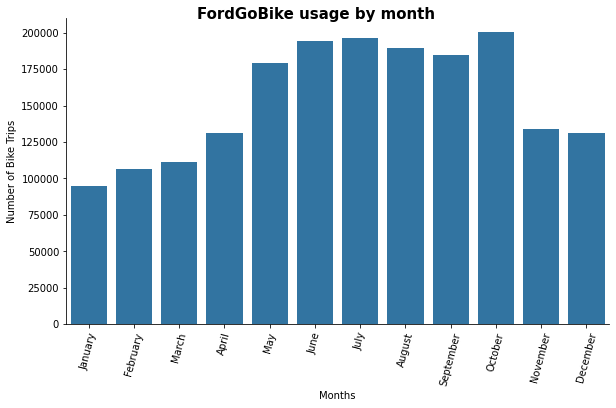

In [32]:
#monthly usage of the FordGoBikes visualization:
graph=sns.catplot(data=df_clean,x='start_time_month',kind='count',color=base_color,aspect=1.7);
graph.set_axis_labels('Months','Number of Bike Trips');
graph.fig.suptitle('FordGoBike usage by month',y=1.0,fontweight='bold',fontsize=15);
graph.set_xticklabels(rotation=75);

### Observation 2: People don't go for party on weekdays
> **From the plot it is clear that tuesday and wednesday are the two days when the bike sharing system is used mostly,followed by thursday, friday and monday**. The graph shows that people used the FordGoBike systems much lesser on the weekends which leaves a clue that the bike-sharing system is mostly used for commuting purpose and formal works.

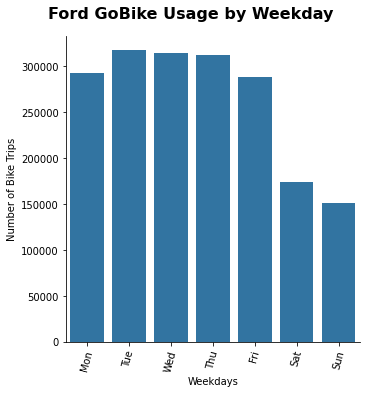

In [33]:
#weekly usage of the FordGoBike systems:
weekday=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
graph=sns.catplot(data=df_clean,x='start_time_day',kind='count',order=weekday,color=base_color);

graph.set_axis_labels('Weekdays', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=75);

### Observation 3: The Rush-Hours
> **The bike sharing system has the primary usage between the morning hours(8-9)am and evening hours(4-6)pm, which is the typical work-hour.** This further suggests that the FordGoBike systems are primarily used by the commuters.

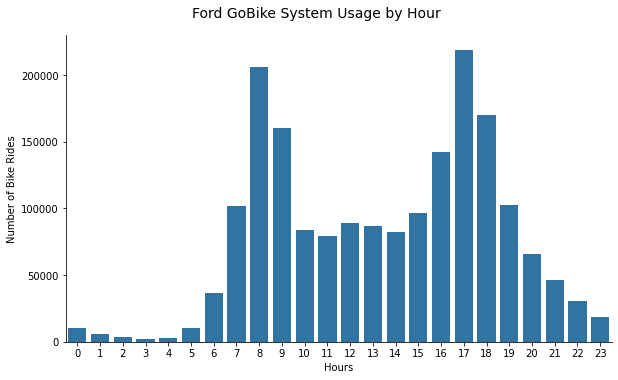

In [34]:
#Hourly usage of the BIke-sharing system:
graph = sns.catplot(data = df_clean, x='start_time_hour', kind='count', color = base_color, aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=14);

In [35]:
#examining the total duration of the bike-rides:
df_clean.duration_min.describe()


count    1.851950e+06
mean     1.372509e+01
std      3.899154e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.439000e+03
Name: duration_min, dtype: float64

In [36]:
# mean duration of the rides:
df_clean.duration_min.mean()

13.725090850184941

### Observation 4: Where do these people live - How long is the ride?
> **The mean ride duration in minutes lies close to 14 minutes, and over 75% of the bike rides are below this mean.This suggests that the bikes are used for shorter durations preferably for commuting to official work.** The duration data is some what normally distributed with a tail in the end.

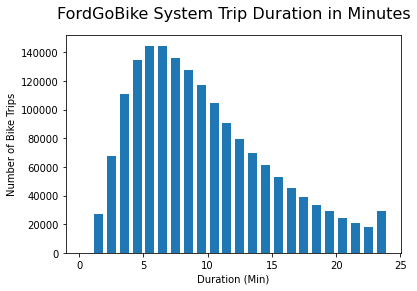

In [37]:
# Let's view the duration of the rides via bar-plot:
bins=np.arange(0,25,1)
ticks = [0, 5, 10, 15, 20, 25]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_clean[df_clean.duration_min<25], x = 'duration_min', bins = bins, rwidth = 0.7);

plt.title("FordGoBike System Trip Duration in Minutes", y=1.05, fontsize=16);
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

In [38]:
#Now let's look into the distance travelled by the bikes:
df_clean.distance_km.describe()

count    1.851950e+06
mean     1.594331e+00
std      1.026884e+00
min      0.000000e+00
25%      8.705716e-01
50%      1.374943e+00
75%      2.088456e+00
max      6.530925e+01
Name: distance_km, dtype: float64

In [39]:
#the mean distance travelled in kms:
df_clean.distance_km.mean()

1.5943307712337504

### Observation 5: Where do these people go-
> **The mean riding distance for the FordGoBikes are close to 1.6 kilometers, around 50% of the rides are such that it is below 1.6 km. 
Thus this further suggests that the bikes are mostly used for short duration maybe a few blocks away or around the bay-official area.**

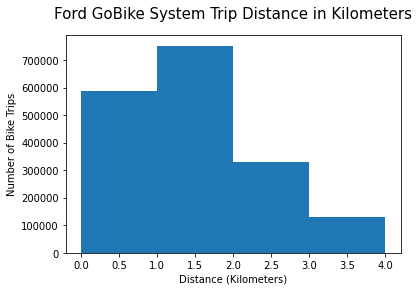

In [40]:
#plotting the distance of the rides:
bins=np.arange(0,5,1)
plt.hist(data=df_clean,x='distance_km',bins=bins);
plt.title("Ford GoBike System Trip Distance in Kilometers", y=1.05, fontsize=15)
plt.xlabel('Distance (Kilometers)')
plt.ylabel('Number of Bike Trips');

In [41]:
#type of users:
df_clean.user_type.describe()

count        1851950
unique             2
top       Subscriber
freq         1574991
Name: user_type, dtype: object

### Observation 6: Who are the USER'S?
> There are more subcsribers riding the fordGoBikes then the customers, this can be helpful as subscibers can be given special preferences and discounts for loyalty so that they would stick to the company, which in-tern will be helpful to counter business competition. The one-time-customers can be given a good user experience and also the company can run a campaign for the one-time-customers so that they get converted to Subscriber in the long run.

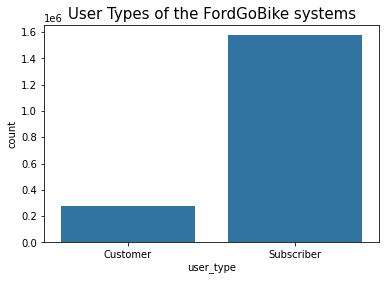

In [42]:
#let's look what type of user rides the bike:
plot=sns.countplot(data=df_clean,x='user_type',color=base_color);
plot.set_title('User Types of the FordGoBike systems',y=1,fontsize=15);

## What do you think the subscriber's group of user be?   
### What they use the bike service for?   
#### And how can the company expand their business and beat their rivals?

In [114]:
#looking into the most visited stations:
df_clean.start_station_id.value_counts()[:10,]


15.0    38461
67.0    37617
30.0    35092
58.0    34918
81.0    33716
6.0     33390
21.0    32131
3.0     31656
16.0    28367
22.0    26535
Name: start_station_id, dtype: int64

Here, we see that the stations with id's(15,67,30,58,81,6,21,3,16,22) are most visited, hence service at these stations should be priority and bikes nust be kept available during the rush-hours here.

###  Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Thanks to the person who very efficiently gathered the data, there were not much cleaning required in the dataset. Though there were some outliers in the ride distance and duration data and some null values in the start and end station names which was easily managed to tackle with the lessons learned in the classroom.



###  Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was almost normally distributed in my search area/area-of-interest. Uptill now the dataset reveals that        
1.The bikes are mostly used in the months of june/july/september/october/november when the weather is sunny with pleasant autumn winds.  
2.It also reveals that the bikes are mostly used in the office hours morning(8-9am) and evening(4-6p.m) on the weekdays.  
3.The dataset further tells that the rides end mostly under 15 minutes of starting the ride and most of the rides are upto 1.6 kilometers in distance.


#  Bivariate Exploration:
> In this section we will be analysing the relationships between two variables of the dataset and get useful insights from it.

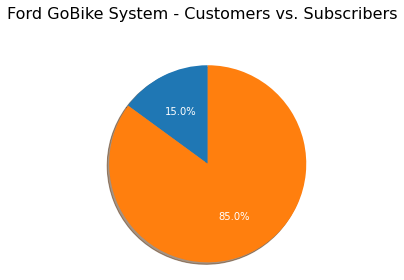

In [43]:
#the percentage of subsribers and customers:
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subs = df_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer=customer/df_clean['bike_id'].count()
subs=subs/df_clean['bike_id'].count()
plot=[customer,subs]

labels = ['Customer', 'Subscriber']
#explode = (0, 0.3)

plt.pie(plot, labels = labels ,autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16);


### Observation 1: Sub's are with us all-year-round
> The user group 'Customer' or one-time-customer uses the bike sharing system mostly in the autumn or early-winters, which is a good time to go arround the bay-area for some good view and fresh breeze.This group will be preferably consisting of tourists or occassional riders that visit the bay.

> On the other hand, the 'Subscriber' group of users use's the bike-sharing system more or less throughout the late-summers, autumn and early-winters. The subscribers mostly use their rides for their daily commute.

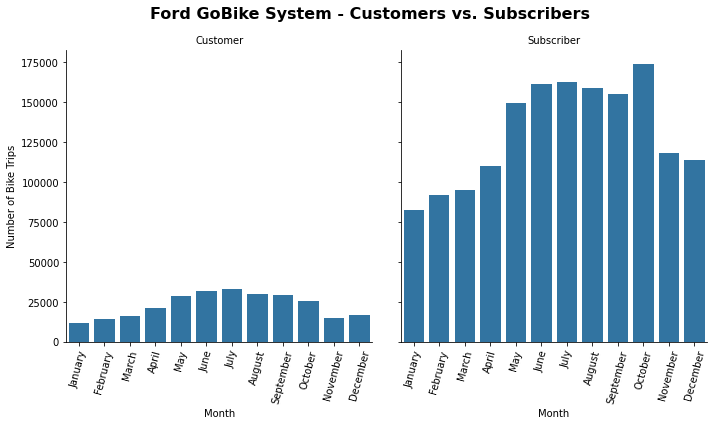

In [44]:
#customer and subscriber bike-usage by month:
graph = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = True, color = base_color);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75); 

### Observation 2: Customers are party people.
> Here, we can see that the subscribers use the rides mostly on the weekdays that further suggests their are a working class of people using the bike-sharing system mostly for their commute.

> The one-time-customers use the rides mostly on the weekends can be preferably for leisure and partying.

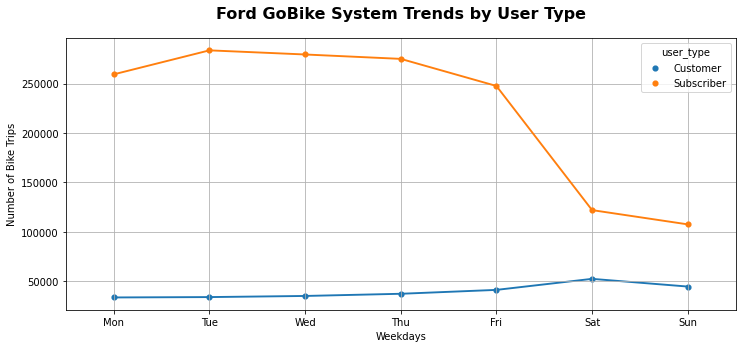

In [45]:
#Customer and subscriber usage of rides on weekdays:
plt.figure(figsize=(12, 5))

df_clean_user_day = df_clean.groupby(['start_time_day', 'user_type']).size().reset_index()
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=df_clean_user_day, x='start_time_day', y=0, hue = 'user_type', scale=.7, order = weekdays);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

In [46]:
df_clean.duration_min.describe()

count    1.851950e+06
mean     1.372509e+01
std      3.899154e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.439000e+03
Name: duration_min, dtype: float64

### Observation 3: Customers V/s Subscribers- who rode the bike longer
> The graph above shows the ride duration in minutes for the two group of users. The Customer-group's ride duration is slightly greater than the Subscriber-group. That can be mostly because of subscribers mostly use bikes for short trips to work/school whereas the one-time-customers took longer trips to go arround the bay-area.

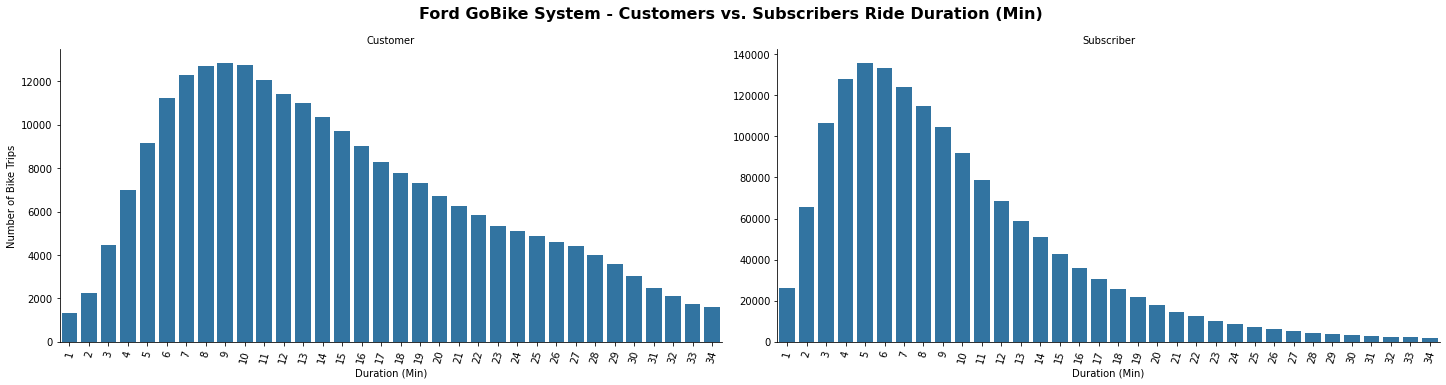

In [47]:
#Customer ride duration v/s subscriber ride duration:
data = df_clean.query('duration_min < 35')

graph = sns.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = base_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

In [48]:
samples = np.random.choice(df_clean.shape[0], 2000, replace = False);
#samp = df_clean.loc[samples, :];
categoric_vars = ['start_time_day', 'start_time_hour', 'user_type']
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [49]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_clean['log_duration_min'] = df_clean['duration_min'].apply(log_trans)

### Observation 4: No bikes available during Rush-Hour = No revenew for the company!
> 1. from the log_duration and user_type graph(3rd row,1st col) it can be observed that the customer's bike-ride mean duration is higher than the subscribers mean bike-ride duration. The bike company can focus on these one-time-customers and increase their subscriber count by giving them good experiences.
2. From the log_duration_min and the start_time_of_day graph(1st row, 1st col), it can be observed that there are more number of rides close to the mean-duration of rides(10 minutes) on the weekdays. **Hence the bike sharing company can use this insight in order to make necessary changes to their algorithms in order to make sure that there are bikes available during these days rather than getting parked on some other less used stations.**

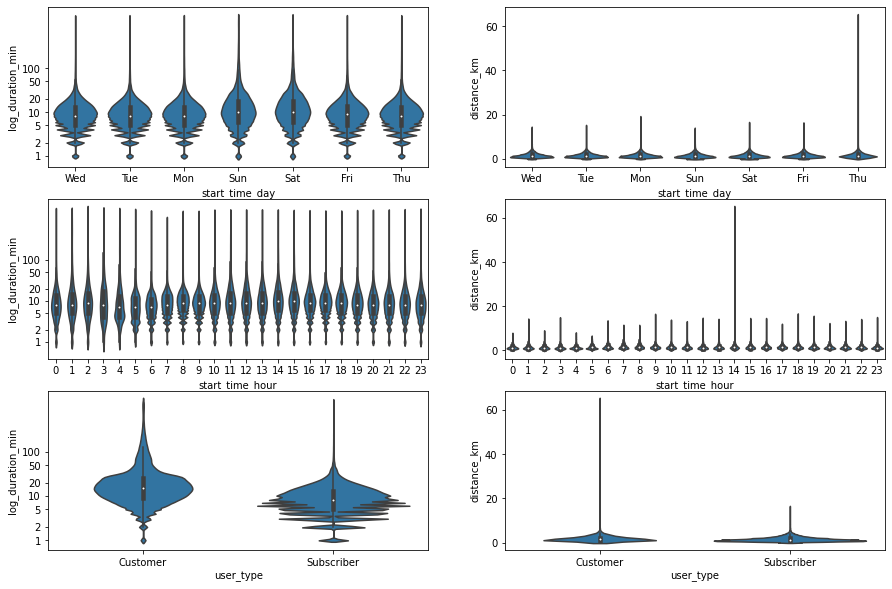

In [50]:
# plot the categorical variables against duration_min and member_age again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows =3 , figsize = [15,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data = df_clean, x = var, y = 'log_duration_min', ax = ax[i,0], color = base_color);
    ax[i,0].set_yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])));
    ax[i,0].set_yticklabels([1, 2, 5, 10, 20, 50, 100]);
    sns.violinplot(data = df_clean, x = var, y = 'distance_km', ax = ax[i,1], color = base_color);

In [57]:
df_clean[['start_time_hour','distance_km']].describe()

,start_time_hour,distance_km
count,1.851950e+06,1.851950e+06
mean,1.350753e+01,1.594331e+00
std,4.742066e+00,1.026884e+00
min,0.000000e+00,0.000000e+00
25%,9.000000e+00,8.705716e-01
50%,1.400000e+01,1.374943e+00
75%,1.700000e+01,2.088456e+00
max,2.300000e+01,6.530925e+01


In [63]:
xbin=np.arange(0,24+1,1)
ybin=np.arange(0,20+5,5)


### Observation 5: Morning Hours- The world's awake but the business sleeps!!

> From the Start_time_hour and the distance_km heatmap, we can see that in the early morning hours the bikes are very least used and hence generates no revenew, using these insights the bike company can come up with early-morning offers with lesser rates so that the bikes could generate revenew.



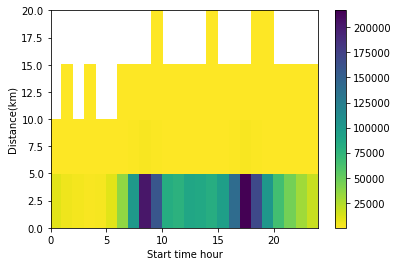

In [64]:
plt.hist2d(data=df_clean,x='start_time_hour',y='distance_km',cmin=0.5,cmap='viridis_r',bins=[xbin,ybin]);
plt.colorbar()
plt.xlabel('Start time hour');
plt.ylabel('Distance(km)');

###  Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The user type analysis revealed much insights about the rides.
1. The data suggests that the one-yime-customers are casual users such as tourists or students or people using the bikes for non-official and leisure works, this insight is also supported by the observation that the 
usage increases on the weekends.
2. On the other hand, the graphs suggests that the subscribers are daily commuters or students during the weekdays for work/official uses.
3. Again it was observed that on the weekdays there were rides mostly of short duration close to the mean_duration of the rides.This can be helpful to the company as they can use this insight to alter their algorithms and try to provide bikes in the rush-hours on the weekdays so as provide good user-experience and generate revenew. **Also it should be noted that the most of the rides are of short duration between 10-15minutes, if the company fails to provide bikes needed at the rush-hour then they might loose rides as the user may prefer to walk rather than waiting for the bikes to arrive looking at the short duration of the bike-ride.**



###  Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A difference in the duration of the rides was observed among the two groups of the user namely the Customers and the Subscribers. The subscribers used the bikes mostly for short trips to-and-fro from work, whereas the customers used the bikes for leisure and non official purposes.**It should be noted that the subscribers must be paid attention for the bikes being available as they are regular users and might prefer to walk arround from work if bikes not avaiable keeping in mind the short duration they travel.**

#  Multivariate Exploration:
> In this section we would be looking into the relationship of one or more variables by plotting them into complex graphs.

 ### Observation: Customers are partying on friday nights.....
 > Customers use the bike sharing system more often on weekends,  
Customers: **During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm.** During weekends, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.


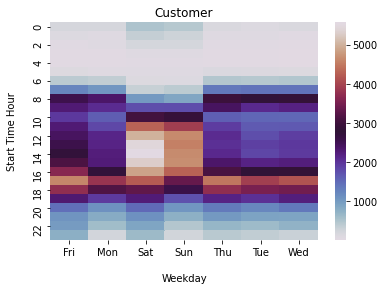

In [71]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_day'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

#plt.figure(figsize=(15,8))

# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_day', 'bike_id')

heat_map = sns.heatmap(df_customer, cmap = 'twilight');

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

### Observation: Subscribers are too hard-working!
> Subscribers mostly use the bike sharing system on weekdays during office hours.  
 **Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm.** During weekends, there is a significant drop in the number of rented bikes.

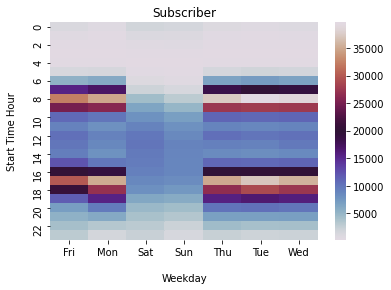

In [66]:
# Heatmap - Subscribers
#plt.subplot(1, 2, 1)
df_subs = df_clean.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].size().reset_index();
df_subs = df_subs.pivot('start_time_hour', 'start_time_day', 'bike_id')

heat_map = sns.heatmap(df_subs, cmap = 'twilight')

plt.title('Subscriber', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

###  Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> The observations in this section amplified the previous observations and insights, by the addition of more variables.  
The one-time-Customer group's key usage hour for the bikes were observed and **it was found that on the weekdays the one-time-customers used the bikes from 4p.m to 6p.m which should be noted because of the reason that the customers mostly use the bikes for leisure and not for important purposes and hence may account for the bikes being stationed in other less important stations, which in-tern will hamper the bike availability for the rush-hours starting from (6p.m to 8p.m)**



###  Were there any interesting or surprising interactions between features?
> An interesting insight found in this section is that the time of usage for the customer's group of users and the subscriber group of users are totally opposite and dosen't collide with each other.  
This could be helpful as the bikes will be occupied evenly during the whole day.  
However this also lead to problems regarding the availability of the bikes for the subscriber's as the customer's uses the bikes before the rush-hours and for leisure works.

## Summary
> Through this project on the FordGoBike dataset very important conclusions can be derived for improving the business and experience of the user's.  
1. Renting a bike from the FordGoBike bike-sharing system is an affordable and convenient way of commuting in and arround the city, both for enjoyment and work.  
2. It is an environment friendly and life-style friendly mode of transportation as there are people with different life-styles being office worker,school student,college student,store worker,leisure purpose,etc.  
3. Subscribers or the daily commuters are a group that uses the bikes for short rides primarily to and fro from work.They uses the bikes mostly on weekdays during the official hours i.e. morning(8-9)a.m. and evening(6-8)p.m.  
4. Customers or occassional riders are mostly tourists who uses the bikes for going arround the places and sight-seeing the bay-area.They use the bikes mostly on the weekends between 11a.m to 6p.m, but on weekdays they prefer to go out between 4p.m to 6p.m.  
5. It was seen in the explorations that on the weekdays the one-time-customers used the bikes from 4-6p.mm in the evening after which the office rush-hour starts.Here the point of availability of the bikes could arise and determine the revenew generated.

### Sources:
1. [FordGoBike](https://s3.amazonaws.com/baywheels-data/index.html) dataset.
2. [Seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html) documentation
3. [Matplotlib](https://matplotlib.org/) documentation for histograms

